In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append(r"C:\Users\ayode\OneDrive - Imperial College London\ME4\FYP\ME4---FYP---Aeroelasticity-Demos\AeroViz")
from modules.Blisks import *

In [6]:
# Define params
n_blades = 20
l_blade = 145.54e-3 # 145.54 mm
b_blade = 70.0e-3 # 70.0 mm
r_disk = 184.55e-3 # 184.55 mm
thickness = 3.5e-3 # 80e-3 # 3.5 mm # 80 mm
blade_thickness = 3.5e-3 # 3.5 mm
disk_thickness = 80e-3 # 80 mm


In [7]:
blisk = Blisk(material='ANSYS Structural Steel', blade_thickness=blade_thickness,disk_thickness=disk_thickness, num_blades=n_blades, blade_length=l_blade, blade_width=b_blade, disk_radius=r_disk)
blisk.precompute_parameters()

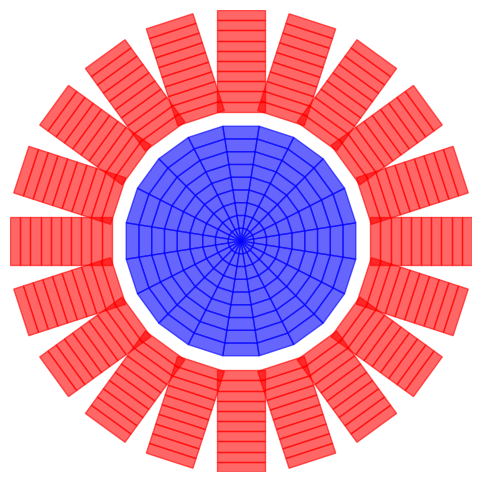

In [8]:
fig = blisk.plot()

In [9]:
analysis = BliskAnalysis(blisk, time=10, intervals=10)

results, mode_freq_df = analysis.compute_deformations()

In [10]:
print(analysis.natural_frequencies)

[array([0.        , 1.00208065]), array([47.33687089,  0.99999907]), array([93.50808624,  0.99999976]), array([137.37683735,   0.99999989]), array([177.86291883,   0.99999993]), array([213.96942672,   0.99999995]), array([244.80729819,   0.99999997]), array([269.61720216,   0.99999997]), array([287.78823629,   0.99999997]), array([298.87296933,   0.99999998]), array([302.59845831,   0.99999998])]


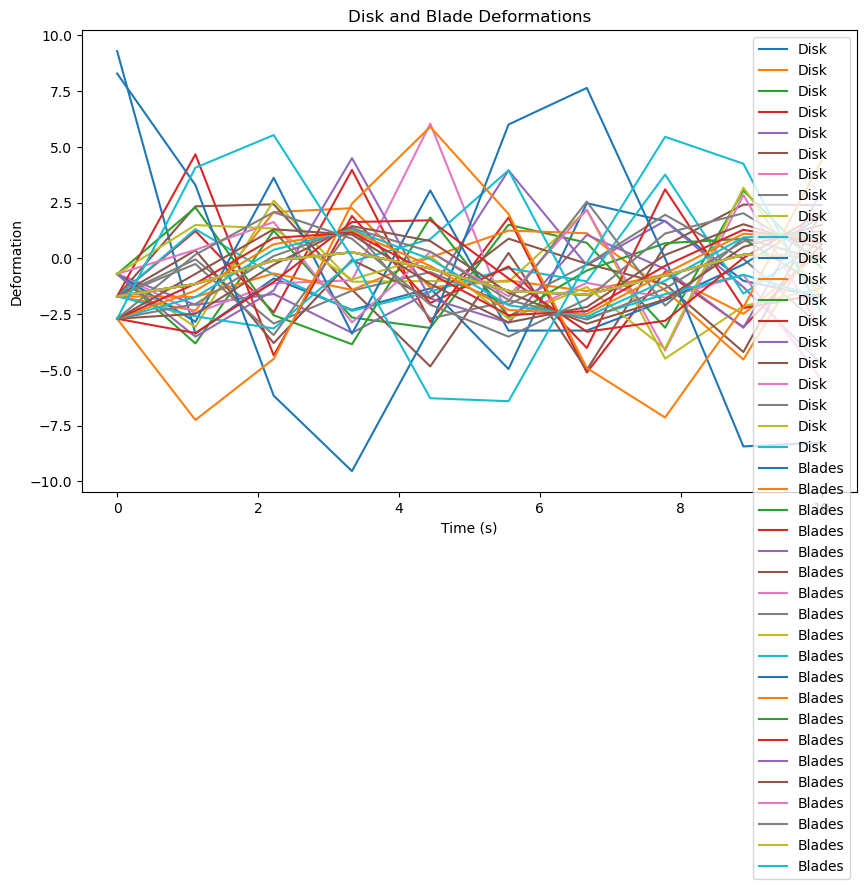

In [11]:
fig = analysis.plot_deformations()

In [12]:
#fig2 = analysis.plot_mode_shapes(modes=[0,1,2])

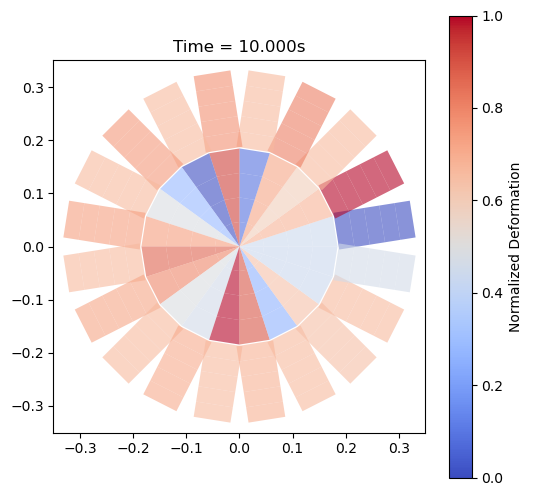

In [13]:
from IPython.display import HTML
ani = analysis.animate_deformations()

In [14]:
HTML(ani.to_jshtml())

In [15]:
mode_freq_df

,Mode,Harmonic Index,Frequency [Hz]
0,0,0,0.000000
1,0,0,66.508367
2,1,1,3141.761077
3,1,1,66.370212
4,2,2,6206.157277
5,2,2,66.370258
6,3,3,9117.738295
7,3,3,66.370266
8,4,4,11804.810604
9,4,4,66.370269


In [16]:
msr_1 = pd.read_csv(r"C:\Users\ayode\OneDrive - Imperial College London\ME4\FYP\ME4---FYP---Aeroelasticity-Demos\Datasets\Blisk_Static_Structural_Modal\MSR_1.csv")
# 10 modes rn, need to be 11 - do later...
msr_1.drop(columns=msr_1.columns[0], inplace=True)
msr_1


,Mode,Harmonic Index,Frequency [Hz]
0,1,0,0.0000
1,2,0,0.0479
2,3,0,376.2700
3,4,0,1105.0000
4,5,0,1566.0000
...,...,...,...
95,6,9,4103.1000
96,7,9,4814.2000
97,8,9,4955.0000
98,9,9,6776.2000


In [17]:
# split by harmonic
msr_1_harmonic_split = msr_1.groupby('Harmonic Index')
mode_freq_df_split = mode_freq_df.groupby('Harmonic Index')
# print 0th harmonic
msr_1_harmonic_split.get_group(0),mode_freq_df_split.get_group(0)

(   Mode  Harmonic Index  Frequency [Hz]
 0     1               0          0.0000
 1     2               0          0.0479
 2     3               0        376.2700
 3     4               0       1105.0000
 4     5               0       1566.0000
 5     6               0       1822.5000
 6     7               0       2829.3000
 7     8               0       3433.3000
 8     9               0       4135.9000
 9    10               0       4817.4000,
    Mode  Harmonic Index  Frequency [Hz]
 0     0               0        0.000000
 1     0               0       66.508367)

In [18]:
print(msr_1_harmonic_split.ngroups)
print(mode_freq_df_split.ngroups)

10
11


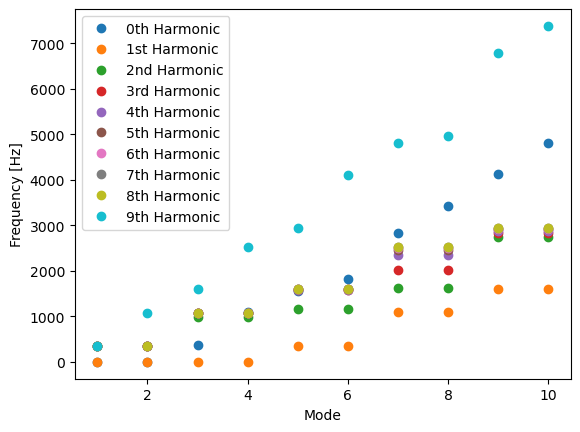

In [19]:
# Plot mode vs frequency for each harmonic - ANSYS results - MSR_1
fig = plt.figure()
ax = fig.add_subplot(111)
for mode in range(len(msr_1_harmonic_split.groups)):
    ax.plot(msr_1_harmonic_split.get_group(mode)['Mode'], msr_1_harmonic_split.get_group(mode)['Frequency [Hz]'], 'o')
ax.set_xlabel('Mode')
ax.set_ylabel('Frequency [Hz]')
ax.legend(['0th Harmonic', '1st Harmonic', '2nd Harmonic', '3rd Harmonic', '4th Harmonic', '5th Harmonic', '6th Harmonic', '7th Harmonic', '8th Harmonic', '9th Harmonic', '10th Harmonic'])
plt.show()


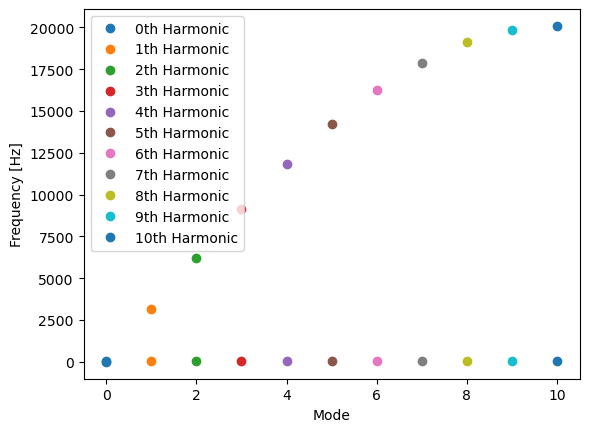

In [20]:
# Plot mode vs frequency for each harmonic - LPM results
fig = plt.figure()
ax = fig.add_subplot(111)
for harmonic, group in mode_freq_df_split:
    ax.plot(group['Mode'], group['Frequency [Hz]'], 'o', label=f'{harmonic}th Harmonic')
ax.set_xlabel('Mode')
ax.set_ylabel('Frequency [Hz]')
ax.legend()
plt.show()

Text(0, 0.5, 'Frequency [Hz]')

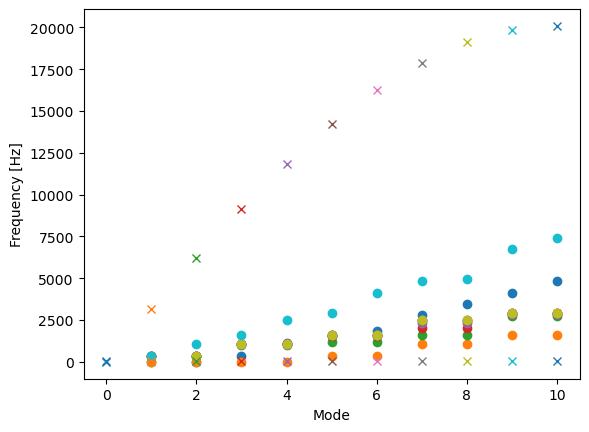

In [21]:
# Results Superimposed
fig = plt.figure()
ax = fig.add_subplot(111)
for mode in range(len(msr_1_harmonic_split.groups)):
    ax.plot(msr_1_harmonic_split.get_group(mode)['Mode'], msr_1_harmonic_split.get_group(mode)['Frequency [Hz]'], 'o')
for mode in mode_freq_df_split.groups:
    ax.plot(mode_freq_df_split.get_group(mode)['Mode'], mode_freq_df_split.get_group(mode)['Frequency [Hz]'], 'x')
ax.set_xlabel('Mode')
ax.set_ylabel('Frequency [Hz]')
#ax.legend(['0th Harmonic ANSYS', '1st Harmonic ANSYS', '2nd Harmonic ANSYS', '3rd Harmonic ANSYS', '4th Harmonic ANSYS', '5th Harmonic ANSYS', '6th Harmonic ANSYS', '7th Harmonic ANSYS', '8th Harmonic ANSYS', '9th Harmonic ANSYS', '10th Harmonic ANSYS', '0th Harmonic LPM', '1st Harmonic LPM', '2nd Harmonic LPM', '3rd Harmonic LPM', '4th Harmonic LPM', '5th Harmonic LPM', '6th Harmonic LPM', '7th Harmonic LPM', '8th Harmonic LPM', '9th Harmonic LPM', '10th Harmonic LPM'])


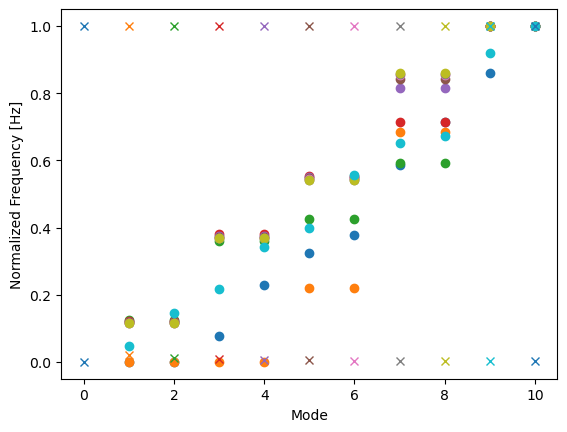

In [22]:
# Normalize ANSYS results
msr_1_harmonic_split_norm = {}
for i in msr_1_harmonic_split.groups.keys():
    group = msr_1_harmonic_split.get_group(i)['Frequency [Hz]']
    msr_1_harmonic_split_norm[i] = group / group.max()  # Normalize within each group

# Normalize LPM results
mode_freq_df_split_norm = {}
for i in mode_freq_df_split.groups.keys():
    group = mode_freq_df_split.get_group(i)['Frequency [Hz]']
    mode_freq_df_split_norm[i] = group / group.max()  # Normalize within each group

# Plot Results Superimposed
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot ANSYS results
for mode in msr_1_harmonic_split.groups.keys():
    ax.plot(
        msr_1_harmonic_split.get_group(mode)['Mode'],
        msr_1_harmonic_split_norm[mode],  # Normalized values
        'o', label=f'{mode}th Harmonic ANSYS'
    )

# Plot LPM results
for mode in mode_freq_df_split.groups.keys():
    group = mode_freq_df_split.get_group(mode)
    ax.plot(
        group['Mode'], mode_freq_df_split_norm[mode], # Normalized values
        'x', label=f'{mode}th Harmonic LPM'
    )

ax.set_xlabel('Mode')
ax.set_ylabel('Normalized Frequency [Hz]')
#ax.legend()
plt.show()


In [23]:
print(mode_freq_df_split_norm[5])

10    1.000000
11    0.004674
Name: Frequency [Hz], dtype: float64


#### To improve validation characteristics, create a solidworks blisk model that better matches how the stiffness characteristics of the blisk are computed

In [24]:
# Arbitrary params - Solidworks
n_blades = 10
l_blade = 100e-3 # 100 mm
b_blade = 5e-3 # 5 mm
r_disk = 50e-3 # 50 mm
blade_thickness = 15e-3 # 15 mm
disk_thickness = 40e-3 # 40 mm



In [25]:
builtin_blisk = Blisk(material='ANSYS Structural Steel', blade_thickness=blade_thickness,disk_thickness=disk_thickness, num_blades=n_blades, blade_length=l_blade, blade_width=b_blade, disk_radius=r_disk)
builtin_blisk.precompute_parameters()

In [28]:
analysis = BliskAnalysis(blisk, time=10, intervals=10)

results, mode_freq_df = analysis.compute_deformations()

In [29]:
analysis.natural_frequencies

[array([0.        , 1.00208065]),
 array([47.33687089,  0.99999907]),
 array([93.50808624,  0.99999976]),
 array([137.37683735,   0.99999989]),
 array([177.86291883,   0.99999993]),
 array([213.96942672,   0.99999995]),
 array([244.80729819,   0.99999997]),
 array([269.61720216,   0.99999997]),
 array([287.78823629,   0.99999997]),
 array([298.87296933,   0.99999998]),
 array([302.59845831,   0.99999998])]

In [30]:
mode_freq_df

,Mode,Harmonic Index,Frequency [Hz]
0,0,0,0.000000
1,0,0,66.508367
2,1,1,3141.761077
3,1,1,66.370212
4,2,2,6206.157277
5,2,2,66.370258
6,3,3,9117.738295
7,3,3,66.370266
8,4,4,11804.810604
9,4,4,66.370269
